In [13]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [14]:
# load image
img = plt.imread('image.png')

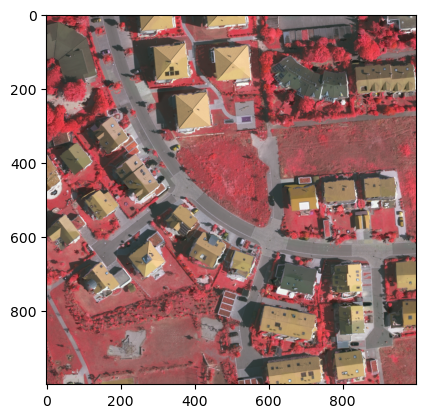

In [15]:
plt.imshow(img)

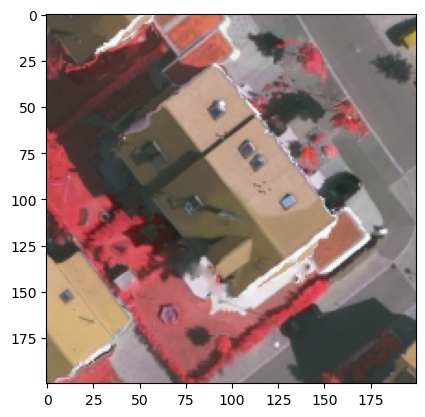

In [16]:
# Crop image
crop_img = img[350:550, 150:350]

plt.imshow(crop_img)

In [17]:
def convolve2d(image, kernel, stride=(1, 1), padding=0):
    # Convert the input image to a NumPy array
    image_np = np.array(image)
    
    # Add padding to the input image
    image_padded = cv2.copyMakeBorder(image_np, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=0)
    
    # Perform convolution
    output = cv2.filter2D(image_padded, -1, kernel, delta=0, borderType=cv2.BORDER_CONSTANT)
    
    # Apply ReLU activation function
    output = np.maximum(output, 0)
    
    # Apply stride
    output = output[::stride[0], ::stride[1]]
    
    return output

def max_pooling(input_data, pool_size=(2, 2), stride=(2, 2)):
    input_height, input_width, input_channels = input_data.shape
    pool_height, pool_width = pool_size
    stride_height, stride_width = stride

    output_height = (input_height - pool_height) // stride_height + 1
    output_width = (input_width - pool_width) // stride_width + 1

    pooled_output = np.zeros((output_height, output_width, input_channels))

    for h in range(output_height):
        for w in range(output_width):
            h_start = h * stride_height
            h_end = h_start + pool_height
            w_start = w * stride_width
            w_end = w_start + pool_width
            for c in range(input_channels):
                patch = input_data[h_start:h_end, w_start:w_end, c]
                pooled_output[h, w, c] = np.max(patch)

    return pooled_output

In [19]:
# Define kernel for sharpening
sharpening = np.array([[0, -1, 0], 
                       [-1, 5, -1], 
                       [0, -1, 0]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


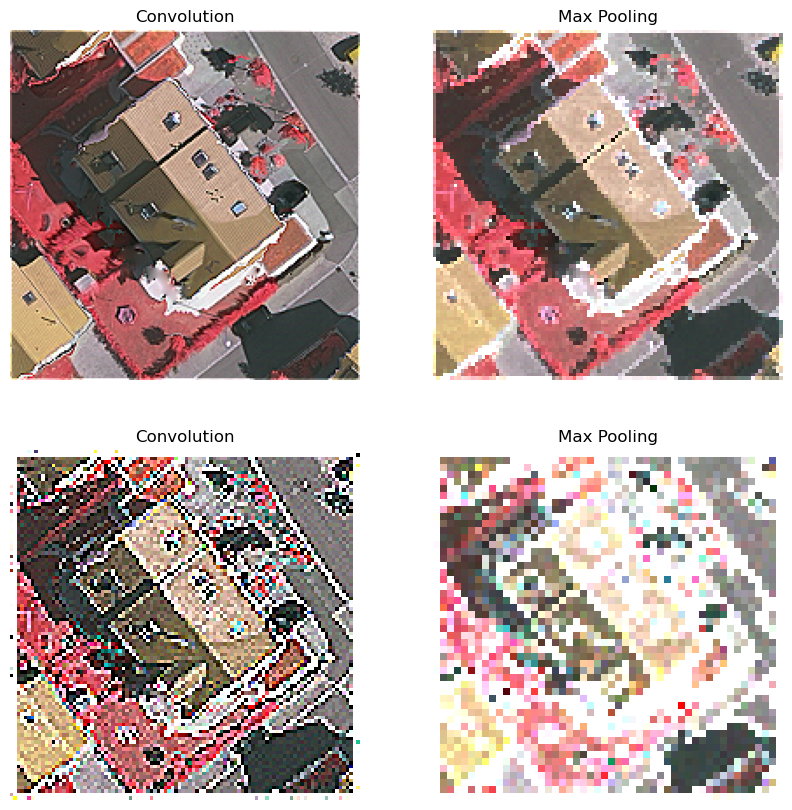

In [28]:
# Apply convolution and max pooling
output_conv = convolve2d(crop_img, sharpening)
output_pool = max_pooling(output_conv, pool_size=(2, 2), stride=(2, 2))
output_conv2 = convolve2d(output_pool, sharpening)
output_pool2 = max_pooling(output_conv2, pool_size=(2, 2), stride=(2, 2))

result = [output_conv, output_pool, output_conv2, output_pool2]

# Plot the result with labels convolution or max pooling
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
    axs[i//2, i%2].imshow(result[i])
    axs[i//2, i%2].set_title('Convolution' if i%2 == 0 else 'Max Pooling')
    axs[i//2, i%2].axis('off')
plt.show()

In [ ]:
# # Define kernel for blurring
# blurring = np.array([[1/9, 1/9, 1/9], 
#                      [1/9, 1/9, 1/9], 
#                      [1/9, 1/9, 1/9]])

# # Define kernel for embossing
# embossing = np.array([[-2, -1, 0], 
#                       [-1, 1, 1], 
#                       [0, 1, 2]])

# # Example kernels
# gaussian_kernel = np.array([[21, 31, 21],
#                             [31, 48, 31],
#                             [21, 31, 21]])/200*1.05

# kernel = [sharpening, blurring, embossing, gaussian_kernel]